# Detecting Objects using MxNet and GluonCV

We can divide image classification in 4 parts: <br /> <br />
To single object in an image: <br />
1) Classification: Classify the image <br />
2) Classification + Localization: Classify the image with bounding box <br />

To multiple objects in an image: <br />
3) Object Detection: Classification + Localization to multiple objects <br />
4) Intance Segmentation: The bouding box follows the curve of objects

In [1]:
# Imports
import mxnet as mx 
import gluoncv as gcv 
import matplotlib 
import matplotlib.pyplot as plt 

In [2]:
# Package versions 
%reload_ext watermark
%watermark -a "Datasnow" --iversions

autopep8   1.4.4
json       2.0.9
numpy      1.18.1
gluoncv    0.8.0
matplotlib 3.1.3
mxnet      1.7.0
Datasnow


In [5]:
# Loading image
imagem1 = mx.image.imread('imagens/cachorro-bike1.jpeg')

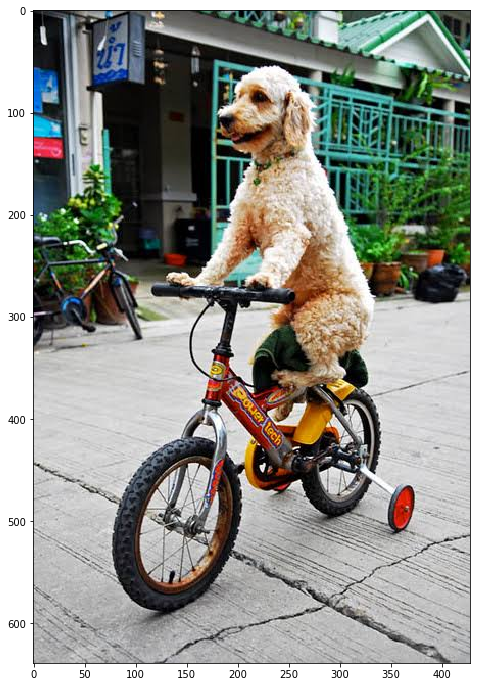

In [8]:
# Plot image
plt.figure(figsize=(25,12))
plt.imshow(imagem1.asnumpy())

In [10]:
#  Transforming the image to format YOLO needed
# https://gluon-cv.mxnet.io/api/data.transforms.html#gluoncv.data.transforms.presets.yolo.transform_test

imagem1_normalizada, imagem1_original = gcv.data.transforms.presets.yolo.transform_test(imagem1, short = 512)

In [11]:
imagem1_normalizada


[[[[-1.6041614  -1.6041614  -1.5870366  ... -0.8506721  -0.8506721
    -0.8506721 ]
   [-1.6041614  -1.5870366  -1.5870366  ... -0.8335474  -0.8335474
    -0.8335474 ]
   [-1.7925336  -1.7582842  -1.7411594  ... -0.78217316 -0.78217316
    -0.78217316]
   ...
   [ 0.34806067  0.41655967  0.57068247 ...  0.9131775   0.9131775
     0.9131775 ]
   [ 0.5878072   0.5193082   0.5364329  ...  0.86180323  0.86180323
     0.86180323]
   [ 0.96455175  0.7590547   0.5878072  ...  0.810429    0.810429
     0.810429  ]]

  [[-1.4929972  -1.4929972  -1.4754901  ... -0.635154   -0.635154
    -0.635154  ]
   [-1.4929972  -1.4754901  -1.4754901  ... -0.60014    -0.617647
    -0.60014   ]
   [-1.6680672  -1.6505601  -1.6330532  ... -0.547619   -0.547619
    -0.547619  ]
   ...
   [ 0.48529422  0.55532223  0.71288526 ...  1.0805323   1.0805323
     1.0805323 ]
   [ 0.7303922   0.6603642   0.6778712  ...  1.0280112   1.0280112
     1.0280112 ]
   [ 1.1155462   0.90546227  0.7303922  ...  0.9754903   0.97

In [12]:
imagem1_original

array([[[ 30,  31,  33],
        [ 30,  31,  33],
        [ 31,  32,  34],
        ...,
        [ 74,  80,  76],
        [ 74,  80,  76],
        [ 74,  80,  76]],

       [[ 30,  31,  33],
        [ 31,  32,  34],
        [ 31,  32,  34],
        ...,
        [ 75,  82,  76],
        [ 75,  81,  77],
        [ 75,  82,  76]],

       [[ 19,  21,  23],
        [ 21,  22,  24],
        [ 22,  23,  25],
        ...,
        [ 78,  85,  78],
        [ 78,  85,  79],
        [ 78,  85,  77]],

       ...,

       [[144, 144, 144],
        [148, 148, 148],
        [157, 157, 157],
        ...,
        [177, 178, 180],
        [177, 178, 180],
        [177, 178, 180]],

       [[158, 158, 158],
        [154, 154, 154],
        [155, 155, 155],
        ...,
        [174, 175, 177],
        [174, 175, 177],
        [174, 175, 177]],

       [[180, 180, 180],
        [168, 168, 168],
        [158, 158, 158],
        ...,
        [171, 172, 174],
        [171, 172, 174],
        [171, 172, 174]]

In [13]:
# Loading Pre-trained model
modelo = gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained=True)

100%|██████████| 224190/224190 [00:17<00:00, 12943.65KB/s]


In [23]:
# Prediciting using normalized image
previsoes_v1 = modelo(imagem1_normalizada)

In [16]:
# Verifying dimensions of array used to save the outputs
for index, array in enumerate(previsoes_v1):
    print(index, ":", array.shape)

0 : (1, 100, 1)
1 : (1, 100, 1)
2 : (1, 100, 4)


In [24]:
# We use only the output with index = 0
previsoes_v1 = [array[0] for array in previsoes_v1]

In [21]:
# Extracting index, probabilities and bounding box
c_indices, c_prob, bouding_box = previsoes_v1

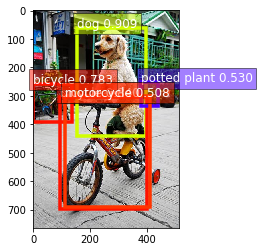

In [22]:
# Generate image with objects detected
gcv.utils.viz.plot_bbox(imagem1_original, bouding_box, c_prob, c_indices, class_names=modelo.classes)

In [25]:
# List used by model
modelo.classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

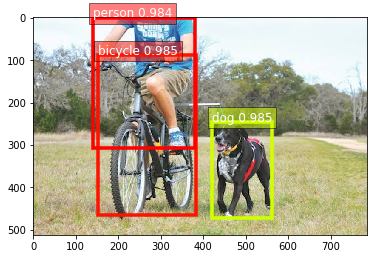

In [27]:
# Image 2
imagem2 = mx.image.imread('imagens/cachorro-bike2.jpeg')

# Transforming Image
imagem2_normalizada, imagem2_original = gcv.data.transforms.presets.yolo.transform_test(imagem2, short=512)

# Make predictions with normalized image
previsoes_v2 = modelo(imagem2_normalizada)

# Get output from index 0
previsoes_v2 = [array[0] for array in previsoes_v2]

# Extracting the index, prob and bouding box
c_indices, c_prob, bouding_box = previsoes_v2

# Generating image with objects detected
gcv.utils.viz.plot_bbox(imagem2_original, bouding_box, c_prob, c_indices, class_names=modelo.classes)


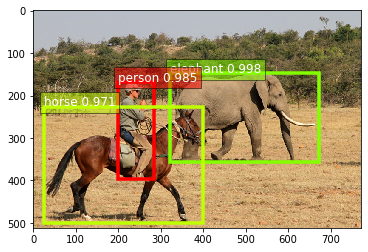

In [28]:
# Image 3
imagem3 = mx.image.imread('imagens/elephant.jpg')

# Transforming Image
imagem3_normalizada, imagem3_original = gcv.data.transforms.presets.yolo.transform_test(imagem3, short=512)

# Make predictions with normalized image
previsoes_v3 = modelo(imagem3_normalizada)

# Get output from index 0
previsoes_v3 = [array[0] for array in previsoes_v3]

# Extracting the index, prob and bouding box
c_indices, c_prob, bouding_box = previsoes_v3

# Generating image with objects detected
gcv.utils.viz.plot_bbox(imagem3_original, bouding_box, c_prob, c_indices, class_names=modelo.classes)


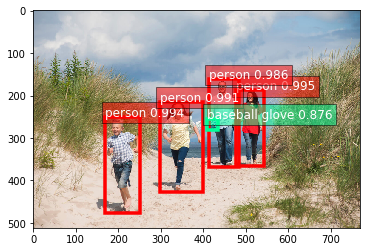

In [30]:
# Image 3
imagem3 = mx.image.imread('imagens/family.jpg')

# Transforming Image
imagem3_normalizada, imagem3_original = gcv.data.transforms.presets.yolo.transform_test(imagem3, short=512)

# Make predictions with normalized image
previsoes_v3 = modelo(imagem3_normalizada)

# Get output from index 0
previsoes_v3 = [array[0] for array in previsoes_v3]

# Extracting the index, prob and bouding box
c_indices, c_prob, bouding_box = previsoes_v3

# Generating image with objects detected
gcv.utils.viz.plot_bbox(imagem3_original, bouding_box, c_prob, c_indices, class_names=modelo.classes)
